In [32]:
from utils import *

In [33]:
generate_inventory(verbose=True)
generate_auction_history(verbose=True)
generate_historic_average_prices()

Total Monies: 176.64
Saving inventory data with (90, 6) shape
13443 auction events
10576 auction events of interest


In [34]:
get_character_needs(['Melue', 'Zegna'])

{'Melue': {}, 'Zegna': {'Free Action Potion': -1, 'Mighty Rage Potion': -5}}

In [17]:
get_character_needs(['Amazoni'])

{'Amazoni': {'Arcane Elixir': -20,
  'Elixir of Fortitude': -40,
  'Elixir of Giants': -15,
  'Elixir of Greater Agility': -2,
  'Fire Protection Potion': -30,
  'Greater Arcane Protection Potion': -31,
  'Greater Stoneshield Potion': -10,
  'Invisibility Potion': -19}}

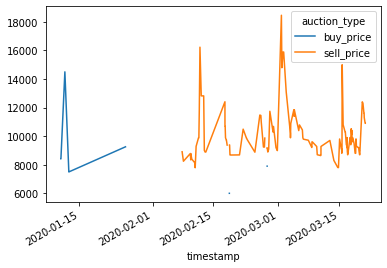

In [18]:
get_profits(item='Elixir of Giants')

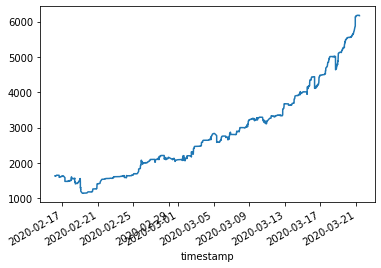

In [19]:
get_profits(date='2020-02-15')

In [20]:
generate_market_average_prices()

In [21]:
generate_item_sell_prices()

In [22]:
prices = pd.read_parquet('intermediate/sell_prices.parquet')

In [28]:
#80 * # Thorium ore 
12 + (12 * 85) + (40 * 0.08) + 50 + 8 + 100
#Arcanite bar 
#10 # Blue sapphire
#4 # Azerothian Diamond

1193.2

In [26]:
12*85

1020

In [35]:
prices['min_list_price']

item
Arcane Elixir                        6900
Elixir of Fortitude                  8600
Elixir of Giants                     7000
Elixir of Greater Agility            6200
Elixir of Greater Intellect          4700
Elixir of Shadow Power              33500
Elixir of Superior Defense           8300
Elixir of the Mongoose              54000
Fire Protection Potion              13300
Free Action Potion                  11300
Greater Arcane Protection Potion     9500
Greater Stoneshield Potion           9400
Invisibility Potion                 14800
Limited Invulnerability Potion      18600
Mighty Rage Potion                  10500
Swiftness Potion                     6100
Name: min_list_price, dtype: int64

In [24]:
prices['lower_price'] = prices['buy_price'].fillna(prices['sell_price'])
prices['upper_price'] = prices['sell_price'].fillna(prices['buy_price'])

KeyError: 'buy_price'

In [ ]:
prices = ((prices['upper_price'] + prices['lower_price']) / 2).dropna()

In [ ]:
prices = pd.read_parquet('intermediate/sell_prices.parquet')

In [ ]:
prices[['gross_profit', 'auction_success']].dropna()

In [ ]:
prices['ingredient_value'] = prices['gross_profit'] * prices['auction_success']

In [ ]:
user_items = load_items()

In [ ]:
ingredient_df = pd.DataFrame()
for item, details in user_items.items():
    if details.get('made_from'):
        for ingredient, count in details.get('made_from').items():
            ingredient_df.loc[item, ingredient] = count
        
# xs = ingredient_df.drop(['Crystal Vial', 'Leaded Vial', 'Empty Vial'], axis=1).fillna(0).astype(int)
# ys = ingredient_raw['ingredient_value']

In [ ]:
ingredient_raw

In [ ]:
def update_beta(pred_beta, y, x, learning_rate=0.02):
    actual_value = y * (x / x.sum())
    actual_value = actual_value[actual_value>0]

    new_beta = pred_beta.copy()
    new_beta.update(actual_value)

    # Introduce some truthiness to the betas
    pred_beta += ((new_beta - pred_beta) * learning_rate)
    return pred_beta

In [ ]:
import numpy as np

In [ ]:
random_start = ((np.random.rand(len(xs.columns)) - 0.5) + 1) * ys.mean()

In [ ]:
pred_beta = pd.Series(random_start, index=xs.columns)

In [ ]:
all_betas = pd.DataFrame(columns=pred_beta.index)

for i in range(800):
    for item, y in ys.sample(10).items():
        x = xs.loc[item]
        pred_beta = update_beta(pred_beta, y, x, learning_rate=0.005)
        
        if verbose:
            beta_proportion = ((pred_beta / pred_beta.sum()))
            all_betas.loc[i] = beta_proportion
if verbose:
    all_betas.plot(legend=False)
            
beta_proportion = ((pred_beta / pred_beta.sum()))            
beta_proportion.sort_values()         

In [ ]:
pred_beta

In [ ]:
# Need a POPULARITY metric, something that signifies how many of the last x auctions have been item

In [ ]:
def analyse_stocktake_value(excluded_characters=[]):
    df = pd.read_parquet('intermediate/inventory.parquet')

    item_count = df.groupby('item')['count'].sum()
    items = load_items()
    # Adjust for self demand
    for item, detail in items.items():
        if 'self_demand' in detail:
            for character, count in detail['self_demand'].items():
                if character not in excluded_characters:
                    if item in item_count.index:
                        item_count.loc[item] -= count

    ####

    # Get prices from below
    prices.name = 'price'
    stocktake = pd.DataFrame(item_count).join(prices)
    stocktake['est'] = stocktake['count'] * stocktake['price']
    print(int(stocktake['est'].sum() / 10000))                
    
    
analyse_stocktake_value(excluded_characters=['Amazoni'])    